## Task 1: Users to Movies


The following example is from from http://web.stanford.edu/class/cs246/slides/06-dim_red.pdf

Consider the following data matrix, $X$, 

<img src="img.png" height="300" width="300" align='center'>

- Here, each row corresponds to the ratings submitted by a single user on a scale of $1$ to $5$ for each of the movies. If a user hasn't submitted a movie rating, then rating is then marked by a zero. 
- By a visual inspection, we see that the movies are either **sci-fi** or **romance**
- The individual movies that we start with can be considered 5 different dimensions, whereas when we group them into two genres (sci-fi or romance), these may be seen as a compressed representation of our data.
- So the natural question is, can we it possible to gain compressed representation of our data matrix to highlight this distinction in our data?


In [22]:
# Import necessary libs:

# 1.import plt from matplotlib
# 2. import Axes3D from mpl_toolkits.mplot3d
# 3. import proj3d from mpl_toolkits.mplot3d
# 4. import FancyArrowPatch from matplotlib.patches

import matplotlib.pyplot as plt 
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch 

In [23]:
# Create the dataset using the np.array() with the data provided above
X = np.array([[1, 1, 1, 0, 0],
              [3, 3, 3, 0, 0],
              [4, 4, 4, 0, 0],
              [5, 5, 5, 0, 0],
              [0, 2, 0, 4, 4],
              [0, 0, 0, 5, 5],
              [0, 1, 0, 2, 2]])
# Store the number of users for further usages.
number_of_users =X.shape[0]
#print(number_of_users)
# Store the number of movies for further usages.
number_of_movies=X.shape[1]
#print(number_of_movies)

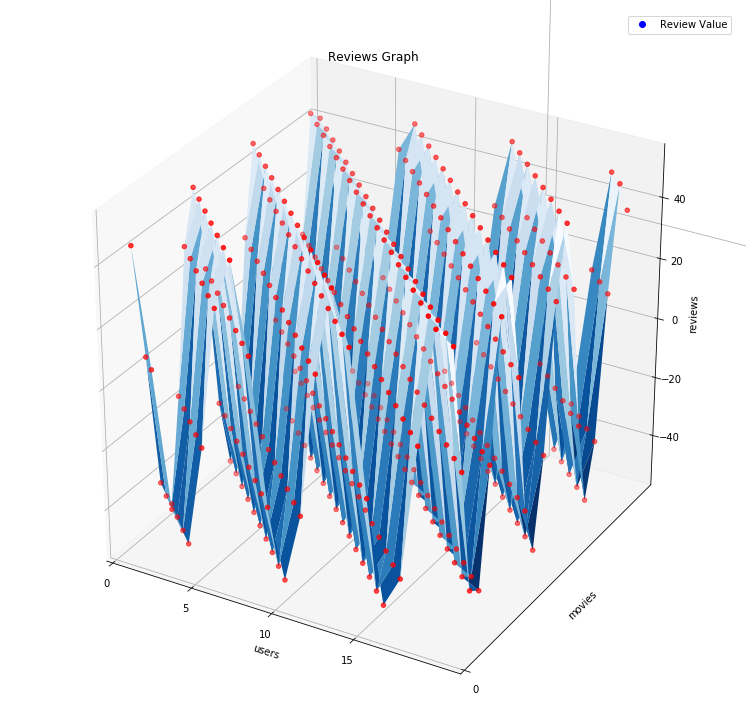

In [24]:
# Plot the data set:
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
# 1. Create three arrays: users, movie, and reviews. to represent the data matrix
#     that is users[0], movie[0] and reviews[0] represent the review of the first user on the first movie.
# tips: use np.array() and flatten() function.

users, movies = np.mgrid[1 : 20 : 20j, 1 : 20 : 20j]
users.flatten()
movies.flatten()
reviews = 50 * np.sin(users + movies)  
reviews.flatten()

# 2. Set the figure size to (13,13) by using the function plt.figure().
plt.figure(figsize=(13,13)) 

# 3. Add the subplot that point the 1*1 grid by using the function add_subplot() on the figure object.
#     set the first positional arguments to 111 and projection to 3d.

Fig3 = plt.figure(figsize=(13,13)) 
Plot1 = Fig3.add_subplot(111, projection='3d')

# 4. Set the font size of the legend to be 10 by using plt.rcParams with 'legend.fontsize' as the key.
plt.rcParams['legend.fontsize'] = 10

# 5. Plot the dataset using plot() for the Sci-fi movie and set x to be the user list, y to be the movie list and z to be the reviews
#     moreover, set resonalbe color and label legend.

Plot1.plot_surface(users, movies, reviews, rstride = 2, cstride = 1, cmap = plt.cm.Blues_r)
legend1 = mpl.lines.Line2D([0],[0], linestyle="none", c='b', marker = 'o')
Plot1.legend([legend1], ['Review Value'], numpoints = 1)

# 6. Plot the dataset using plot() for the Romance follow the pervious instruction.

Plot1.scatter(users, movies, reviews, c='red')

# 7. Set the legend to a proper position using ax.legend(loc=?)

#plt.legend(loc="upper left")

# 8. Set label for the x and y axis with proper front size using plt.xlabel(...)

Plot1.set(xlabel='users', ylabel='movies', zlabel='reviews')

# 9. Set the title of this fig using plt.title()

plt.title("Reviews Graph") 

# 10. Set the ticks for x axis and y aixs by using plt.xticks()/yticks()

Plot1.set_xticks([0., 5., 10., 15.])
num_ticks = 2.
Plot1.set_yticks(np.arange(num_ticks)/(num_ticks-1) * 50)

# 11. plot and present the fig using plt.show()
plt.show()

In [25]:
# Data Preprocessing:
# 1. Calculate the mean of the data set
#print(X.shape)
n = X.mean(axis=1)
n = n.reshape(*n.shape, 1)
#print(n.shape)

# 2. Subtract the mean from the data set
new_data=np.subtract(X, n)
#print(new_data)

# 3. Store the new centered data set
new_centered_data= np.array(new_data)
#print(new_centered_data)

## Solution1: Implementing PCA using Singular Value Decomposition (SVD)

We start with the simplest and most straightforward strategy first - **Singular Value Decomposition**. <br>

From our Matrix theory, we know that ever matrix out there can we decomposed into a multiplication of 3 matrices (image is from Tim Roughgarden):

$$ X = U S  V^T$$

In class we proved that we can use the SVD to factorize $X^TX=(USV^T)^T(USV^T)=VS^2V^T$.

The principal components of the matrix $A=X^TX$, lie in the rows of matrix $V^T$. Therefore, by selecting the first $k$ columns of $V$, we end up selecting $v_1, v_2, ..., v_k$ vectors.


In [26]:
# Calculate the U, S, V^T:
# 1. Use the singular value decomposition from numpy.
from scipy.linalg import svd

# 2. np.linalg.svd()
u,s,vT=svd(X)

# 3. Store the u,s,v^T values
#print(u)
#print(s)
#print(vT)

In [27]:
print("U.shape, S.shape, V.T.shape ->", u.shape, s.shape, vT.shape, end="\n\n")

print("U =", np.around(u.shape, decimals = 3, out = None), sep="\n", end="\n\n")

print("S =",np.around(s.shape, decimals = 3, out = None), sep="\n", end="\n\n")

print("V.T =",np.around(vT.shape, decimals = 3, out = None), sep="\n", end="\n\n")

U.shape, S.shape, V.T.shape -> (7, 7) (5,) (5, 5)

U =
[7 7]

S =
[5]

V.T =
[5 5]



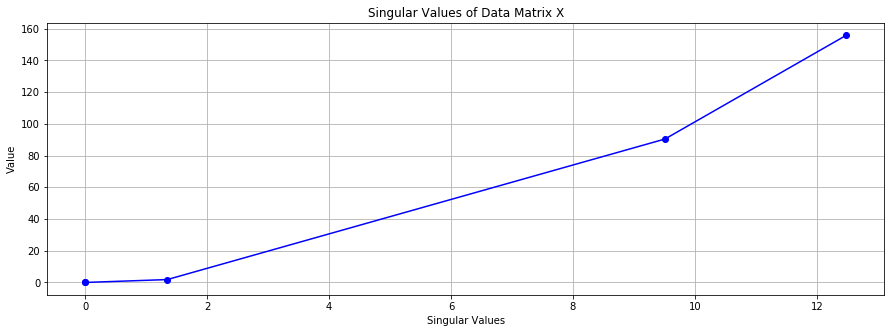

In [28]:
# plot the singlar values for the  D  matrix.
# 1. Calculate the D matrix using s: D is s*s
D_matrix=s*s
#print(D_matrix)
#print(s)
# 2. Set the fig size to (15,5)
fig=plt.figure()
plt.figure(figsize=(15,5))
# 3. Add the line chart using plt.plot( ?? ,'bo-')
plt.plot(s, D_matrix, color='blue',marker='o')
# 3. Add proper tital, ticks, axis labels
plt.title('Singular Values of Data Matrix X')
plt.xlabel('Singular Values')
plt.grid(True)
plt.ylabel("Value")
plt.show()

In [29]:
# Obtaining our compressed data representation:
# 1. Determine at least k singular values are needed to represent the data set from the fig above
num_components = 5
num_k = np.matrix(u[:, :num_components]) * np.diag(s[:num_components]) * np.matrix(vT[:num_components, :])

# 2. Obtain the first k of v^T and store it
np.matrix(vT[:num_components, :])

# 3. Calculate the compressed data using np.matmul(), X and stored first k of v^T
cmp = np.matmul(X,vT)
# 4. Print the compressed value of X
print(cmp)

[[ -2.59495413e-02  -1.42642201e+00  -2.59495413e-02  -6.94252657e-01
   -6.94252657e-01]
 [ -7.78486238e-02  -4.27926602e+00  -7.78486238e-02  -2.08275797e+00
   -2.08275797e+00]
 [ -1.03798165e-01  -5.70568802e+00  -1.03798165e-01  -2.77701063e+00
   -2.77701063e+00]
 [ -1.29747706e-01  -7.13211003e+00  -1.29747706e-01  -3.47126329e+00
   -3.47126329e+00]
 [ -2.57514436e+00  -5.75411692e-02   3.08170989e+00   1.43767469e+00
   -4.21917956e+00]
 [ -3.53553391e+00   2.50314453e-15   3.53553391e+00   3.53553391e+00
   -3.53553391e+00]
 [ -1.28757218e+00  -2.87705846e-02   1.54085494e+00   7.18837343e-01
   -2.10958978e+00]]


Let's visualize what just happened.

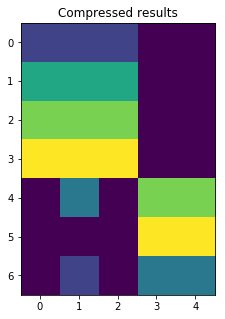

In [30]:
# Visualize what just happened:
# 1. Set the fig size to (15,5)
plt.figure(figsize=(15,5))
# 2. Create propor title, axis and legend
plt.title("Compressed results") 
# 3. Plot the data
plt.imshow(num_k)
plt.show()

## Solution2: Directly computing  V and D 

Now we compute $V$ (aka as the eigenvectors), and the diagonal elements of $D$ (aka eigenvalues) from $A=X^TX=V D V^T$

The covariance matrix data matrix, $X$, can be computed as  $\frac{1}{N}X^TX$. <br>
If $X$ is our data matrix comprising of $d$ features. Then $X^TX$ is a $(d \times d)$ symmetrix matrix wherein each entry at location **ij** corresponds to the scalar projection of **feature i** with **feature j**.

In [31]:
# Alternative implementation：
# Directly computing V and D from X and X^T
# 1. Comput XTX using np.matmul() and store it.
XTX=np.matmul(X,X.T)
#print(XTX)
# 2. Apply np.linalg.eig() to clculate the eigen vectors and values
eigenvalues, eigenvectors= np.linalg.eig(XTX)

In [32]:
print("V (Eigen-vectors) = ")
print(np.around(eigenvalues, decimals=3))
print()
print("diagonal elements of D (Eigen-values) = ")
print(np.around(eigenvalues, decimals=3)) 
print()
print("sqrt(Eigen-values) = ")
print(np.around(np.sqrt(np.abs(eigenvalues)), decimals=3))

V (Eigen-vectors) = 
[ 155.776   90.414    1.811   -0.       0.      -0.       0.   ]

diagonal elements of D (Eigen-values) = 
[ 155.776   90.414    1.811   -0.       0.      -0.       0.   ]

sqrt(Eigen-values) = 
[ 12.481   9.509   1.346   0.      0.      0.      0.   ]


Notice the following:
1. That the **square-root of the eigen-values** of the covariance matrix $X^TX$ correspond exactly the the **singular values** of the data matrix $X$.
2. The **eigen-vectors** of $X^TX$ are exactly the same as the column vectors in the matrix $V$ when we performed SVD on $X$.

Therefore, the same Princpal components of our data matrix $X$, may be extracted via SVD or from $X$'s convariance matrix.


## Task 2: Human Faces 

Each image is a 62x47 pixel array. The images are read into a matrix called fea. Each row of the matrix fea represents one image (example). The features (columns) are the pixel values. Each example is represented by a vector of real numbers of length 2914, listing the pixels from left to right, row by row, from top to bottom.

In [33]:
# Import libs:
# 1. numpy
# 2. matplotlib and plt
# 3. pandas
# 4. fetch_lfw_people from sklearn.datasets

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.datasets import fetch_lfw_people 

In [34]:
# Data set:
# 1. Load the dataset using fetch_lfw_people() with min_faces_per_person setted to be 70
#     detail of min_faces_per_person please refer to https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html
lfw_people=fetch_lfw_people(min_faces_per_person=70)
fea = lfw_people
# 2. Store the number of images and its hight, width using lfw_people.images.shape
images,h,w=lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
# 3. Calculate number of pixels
number_of_pixels=h*w
#print(number_of_pixels)
# 4. Store the pixel values using lfw_people.data
pixel_values=lfw_people.data

In [35]:
def plt_face(x):
    global h,w
    plt.imshow(x.reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks([])

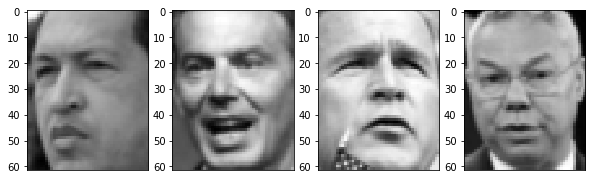

In [36]:
from sklearn.model_selection import train_test_split
# Use the function we provided above, plot some faces:
# 1. Define the fig size to (10,20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
plt.figure(figsize=(10,20))
# 2. Use plt_face()
pltn=4
for i in range(pltn):
    plt.subplot(1,pltn,i+1)
    plt_face(pixel_values[i])
# 3. plt.show()


plt.show()


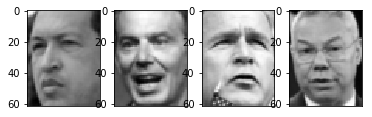

In [37]:
# Find the Mean picture:
# 1. Calculate the mean of the image data
mean=np.mean(lfw_people.data)
#print(mean)
# 2. Remove the mean from all the image
zero_mean= lfw_people.data-mean
# 3. plot the face use plt_face()
pltn=4
for i in range(pltn):
    plt.subplot(1,pltn,i+1)
    plt_face(pixel_values[i])
plt.show()

In [38]:
# Find eig vec and eig value:
# 1. Calculate the covariance metric of the zero_mean data
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

Covariance_matrix=np.cov(zero_mean)
print(Covariance_matrix)

# 2. Use the np.linalg.eig() to compute eig value and eig vectors
eigval, eigvec=np.linalg.eig(Covariance_matrix)
print(eigval)
print(eigvec)

# 3. Find the top5 features
n_components = 5
print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))


# 4. Calculate the new value based on the top5 feature.
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

t0 = time()

# 5. Store the new value.
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

[[ 1383.73680334   833.04919232   414.91977029 ...,   593.03913347
    498.53396718   512.88488709]
 [  833.04919232  2268.90755788   744.27493937 ...,   710.12179572
    867.011034     775.91355739]
 [  414.91977029   744.27493937  1444.15891032 ...,   548.906584
    562.87645803   699.96506889]
 ..., 
 [  593.03913347   710.12179572   548.906584   ...,  1431.88762305
    167.08464825   442.88896354]
 [  498.53396718   867.011034     562.87645803 ...,   167.08464825
   1415.66598556   779.4841721 ]
 [  512.88488709   775.91355739   699.96506889 ...,   442.88896354
    779.4841721   1207.82851421]]
[  7.99449607e+05   2.70476169e+05   1.28029232e+05 ...,   1.77830124e+00
   1.92635849e+00   1.89143024e+00]
[[ 0.02571836 -0.00600056  0.01078162 ..., -0.0102996  -0.0055162
   0.00683297]
 [ 0.04116073  0.01505017 -0.00908918 ...,  0.05237633  0.03929774
  -0.00642024]
 [ 0.02415013  0.01011944 -0.01380516 ...,  0.0118383   0.01208931
   0.00719095]
 ..., 
 [ 0.02099923 -0.01660733 -0.025

In [39]:
print("Top 5 Vector:")
print(eigenfaces.real.tolist())
print()
print("Top 5 EigVal:")
print()
print(eigenfaces.real)
print()
print("Associateed 5 attributes in fourth image")
print("Indexing by",eigenfaces)
print()
fea = dir(fea)
#print(fea[3])

Top 5 Vector:
[[[-0.005394866224378347, -0.005700864363461733, -0.006383580155670643, -0.007575854193419218, -0.00871738139539957, -0.00916608888655901, -0.010254653170704842, -0.011266783811151981, -0.011551856063306332, -0.011688999831676483, -0.012001699768006802, -0.012279643677175045, -0.012487871572375298, -0.012619641609489918, -0.01283284928649664, -0.013136688619852066, -0.013551940210163593, -0.013849642127752304, -0.014131718315184116, -0.014187862165272236, -0.014159641228616238, -0.014184110797941685, -0.014332329854369164, -0.014529033564031124, -0.01462460495531559, -0.014772998169064522, -0.01483785081654787, -0.015016421675682068, -0.015324530191719532, -0.01545059122145176, -0.015408981591463089, -0.015241577289998531, -0.014942066743969917, -0.014614880084991455, -0.014309140853583813, -0.01415583211928606, -0.014221180230379105, -0.013819416984915733, -0.012875068932771683, -0.011919289827346802, -0.01108818594366312, -0.009966292418539524, -0.008836996741592884, -0

In [ ]:
print("Top 5 EigVal:")
print()
print(eigenfaces.real)

In [ ]:
# prjection of fourth face to first 5 principle components
print("The proejction of fourth image")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf = clf.fit(X_train_pca, y_train)
print(clf.best_estimator_)


t0 = time()
y_pred = clf.predict(X_test_pca)

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)


In [ ]:
# project back to the image space where d=5
# X’= X_pca * VT  + X_mean 
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, 62, 47)


In [ ]:
# project back to images where d=50
# 1. Find top 50 eig vec and eig val
sorted_index_array = np.argsort(eigval) 
sorted_array = eigval[sorted_index_array] 
sorted_array1 = eigvec[sorted_index_array] 
# 2. Store the top 50 eig vec
n = 50  
rslt = sorted_array[-n : ] 
# 3. Store the top 50 eig val
n = 50  
rslt2 = sorted_array1[-n : ] 
# 4. compute the newfeature using top50 eig vec and eig val.
n_features = rslt.shape
# 5. plot the feace
print(zip(n_features))
plt.show()


# Project Report/Answers to questions 

This Project utilizes the Principal Components Analysis (PCA) which is a dimensionality reduction algorithm on two different tasks. In the first task we use a data set consisting of reviews and ratings and genres. We implement the PCA algorithm and we calculate the features after PCA. 

#1. First run the program to get the desired output for all parts. In task 1, we implement PCA using Singular Value Decomposition (Solution 1). Then, I manage to plot the eigenvalues by selecting the right number of principal components. The number I chose is 5 because the data is 5 dimensional. 

#2. Then, I implemented PCA by directly computing the eigenvectors (V) and the eigen values (D) from the covariance matrix. Then I printed the eigen values and eigen vectors. 

#3. In Task 2, I used The Labeled Faces in the Wild dataset to implement PCA on. By Running Task 2, the desired outputs will be shown. This includes loading the dataset and diaplaying the fourth face, computing the mean of all the examples in the dataset dea. Then, I displayed the mean image. This also includes computing the 5 top principal components of the data matrix fea. In the end, I displayed the images after PCA. 